In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm


2022-04-06 17:44:23.634512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-06 17:44:23.634542: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.11.0')

In [4]:
torch.cuda.is_available()

False

In [4]:
path = Path('/home/jazzyy/Text_Summ/language-model')

In [5]:
from inltk.tokenizer import GujaratiTokenizer

In [6]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../Tokenization/gujarati_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(20000)]

In [7]:
itos


['<unk>',
 '<s>',
 '</s>',
 '▁',
 '.',
 ',',
 '▁છે',
 '▁અને',
 'ની',
 'ના',
 'માં',
 '▁આ',
 'ને',
 '▁જ',
 '▁એક',
 'નો',
 '▁આવેલા',
 '▁તેમ',
 'નું',
 '▁કે',
 '▁ગામમાં',
 'થી',
 '▁માટે',
 '▁પણ',
 '▁ખેતી',
 '▁આવે',
 '▁કરવામાં',
 '▁તે',
 '▁ભાગમાં',
 '-',
 'ો',
 'ે',
 '▁હતી',
 '�.',
 '▁પર',
 'ી',
 '▁જે',
 '▁હતા',
 '▁ગામ',
 '▁ભારત',
 '▁મુખ્ય',
 'એ',
 '▁હતો',
 'X',
 '▁આવેલું',
 '▁ગુજરાત',
 '▁હતું',
 '▁એ',
 '▁સાથે',
 '▁કરી',
 '▁પશ્ચિમ',
 '▁રાજ્યના',
 '▁દેશના',
 '▁ડેરી',
 '▁શાળા',
 '▁મુખ્યત્વે',
 '▁અન્ય',
 '▁જેવી',
 '▁પ્રાથમિક',
 'ં',
 'દૂધની',
 '▁તરીકે',
 '▁હોય',
 '▁ગામના',
 '▁પશુપાલન',
 '▁દ્વારા',
 '▁ખેતમજૂરી',
 '▁આંગણવાડી',
 '▁વ્યવસાય',
 '▁પંચાયતઘર',
 '▁પ્રાપ્ય',
 '▁સવલતો',
 '▁કરે',
 '▁લોકોનો',
 '▁તાલુકામાં',
 '▁જિલ્લામાં',
 '▁પાક',
 '▁થયેલી',
 'ા',
 'સ',
 '▁થાય',
 '�',
 '▁શાકભાજીના',
 '▁કુલ',
 'ર',
 '▁તેઓ',
 '▁એવા',
 'ક',
 'ન',
 '▁���',
 '▁રીતે',
 '▁��',
 '▁બાજરી',
 '▁"',
 'લ',
 '▁લોકો',
 '▁પૈકીના',
 '▁તેમણે',
 '▁કપાસ',
 '▁તેના',
 '"',
 '▁તાલુકાઓ',
 'નાં',
 'ઓ',
 '▁આવી',
 '▁વધુ',
 '▁તેમના',

In [8]:
gujarati_vocab = Vocab(itos)

In [9]:
tokenizer = Tokenizer(tok_func=GujaratiTokenizer, lang='gu')

In [11]:
data_lm = TextLMDataBunch.from_folder(path=path, tokenizer=tokenizer, vocab=gujarati_vocab)

/home/jazzyy/anaconda3/lib/python3.9/site-packages/fastai/core.py:299: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


In [12]:
data_lm.batch_size = 8

In [13]:
data_lm.show_batch()

idx,text
0,"▁છે . ▁આ ▁ગામમાં ▁પ્રાથમિક ▁શાળા , ▁પંચાયતઘર , ▁આંગણવાડી ▁તેમ ▁જ ▁દૂધ ની ▁ડેરી ▁જેવી ▁સવલતો ▁પ્રાપ્ય ▁થયેલી ▁છે . ▁x x bo s ▁ગુજરાત ▁અને ▁ભારતમાં ▁સ્થાન ▁કાન સ રીયા ▁એ ▁ભારત ▁દેશના ▁પશ્ચિમ ▁ભાગમાં ▁આવેલા ▁ગુજરાત ▁રાજ્યના ▁ગીર ▁સોમનાથ ▁જિલ્લાના ▁ગીર ▁ગઢડા ▁તાલુકામાં ▁આવેલું ▁ગામ ▁છે . ▁આ ▁ગામના ▁લોકોનો ▁મુખ્ય ▁વ્યવસાય ▁ખેતી , ▁ખેતમજૂરી ▁તેમ ▁જ ▁પશુપાલન ▁છે . ▁ગામમાં ▁મુખ્યત્વે ▁ઘઉં , ▁બાજરો , ▁કપાસ"
1,▁ડેસ િઆ નો ▁ભાગ ▁બની ▁ગયુ . ▁ખનીજ ની ▁સમૃદ્ધ ▁અનામત ો ▁પ્રદેશમાં થી ▁મળી ▁આવી ▁અને ▁ખાસ ▁કરીને ▁સોના ▁તથા ▁ચાંદી ની ▁માત્રા ▁અત્યંત ▁વધારે ▁હતી . ▁જેના ▁પરિણામે ▁રોમ ે ▁આ ▁પ્રાંત નું ▁ભારે ▁સંસ્થાન ીકરણ ▁કર્યુ . ▁આનાથી ▁ગ્રામ્ય ▁લેટિન ▁આવ્યું ▁અને ▁ગહન રો મન - કરણ નો ▁દોર ▁આવ્યો ▁કે ▁જેનાથી ▁મૂળ - રો માન િયન નો ▁સમય ▁શરૂ ▁થયો . ▁આ ▁ઉપરાંત ▁ઈસ . ▁3
2,"▁છે . ▁જેઠ ▁- વૈશાખ માં ▁તે ▁રોપ ાય ▁છે ▁અને ▁માગ સર - પોષ ▁માં ▁તે ▁ખોદી ▁કાઢવા માં ▁આવે ▁છે . ▁ભારતમાં ▁સર્વત્ર ▁થાય ▁છે . ▁સૂરણ માં ▁બે ▁જાત ▁હોય ▁છે : ▁એક ▁મીઠી ▁અને ▁બીજી ▁ખૂ જ લી વાળી , ખ ૂ જ લી વાળુ ▁સૂરણ ▁ખાવા થી ▁વ વળ ાટ ▁થાય ▁છે ▁અને ▁મોં ▁સૂ જી ▁જાય ▁છે . ▁આવા ▁સૂરણ નો ▁કંદ ▁લી સો"
3,". ▁શહેરના ▁ઇતિહાસમાં ▁બે ▁વખત , ▁નામ ને ▁બેઇજિંગ ▁થી ▁બે ઇ પિંગ માં ▁બદલવા માં ▁આવેલું ; <unk> િક ▁અર્થે ▁' ઉત્તર ી ▁શાંતિ ' . ▁આ ▁પ્રથમ ▁વખત ▁મિંગ ▁સામ્રાજ્યના ▁હોંગ હુ ▁સમ્રાટ ▁હેઠળ ▁બન્યું , ▁અને ▁ફરીથી ▁1928 ▁માં ▁રીપબ્લિક ▁ઓફ ▁ચાઈના ના ▁ક્યુ ઓ મિ ન્ટે ંગ ▁સરકાર માં ▁બન્યું . ▁દરેક ▁પ્રસંગે , ▁બદલે લ ▁નામ ▁' રાજ ધા ની ' ▁ના ▁અર્થ ના ▁તત્ત્વ"
4,"▁ભાગમાં ▁આવેલા ▁ગુજરાત ▁રાજ્યના ▁સૌરાષ્ટ્ર ▁વિસ્તારના ▁જૂનાગઢ ▁જિલ્લામાં ▁આવેલા ▁વિસાવદર ▁તાલુકામાં ▁આવેલું ▁એક ▁ગામ ▁છે . ▁આ ▁ગામના ▁લોકોનો ▁મુખ્ય ▁વ્યવસાય ▁ખેતી , ▁ખેતમજૂરી ▁તેમ ▁જ ▁પશુપાલન ▁છે . ▁આ ▁ગામમાં ▁મુખ્યત્વે ▁ઘઉં , ▁જીરુ , ▁મગફળી , ▁તલ , ▁બાજરી , ▁કપાસ , ▁દિવેલા , ▁રજકો ▁તેમ ▁જ ▁અન્ય ▁શાકભાજીના ▁પાક ની ▁ખેતી ▁કરવામાં ▁આવે ▁છે . ▁આ ▁ગામમાં ▁પ્રાથમિક ▁શાળા , ▁પંચાયતઘર , ▁આંગણવાડી ▁તેમ ▁જ ▁દૂધ ની"


In [14]:
data_lm.save()

In [15]:
learn = language_model_learner(data_lm, TransformerXL, pretrained=False)

In [16]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/home/jazzyy/anaconda3/lib/python3.9/site-packages/fastai/text/models/transformer.py:114: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755849709/work/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1391.)
  attn_score = attn_score.float().masked_fill(mask, -float('inf')).type_as(attn_score)
/home/jazzyy/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:173: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755849709/work/aten/src/ATen/native/TensorAdvancedIndexing.cpp:1391.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


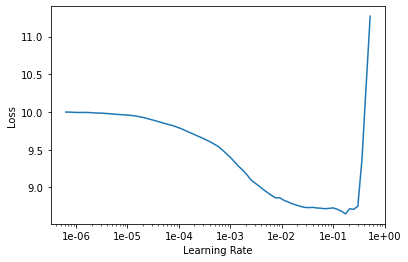

In [17]:
learn.recorder.plot()

In [18]:
learn.model

SequentialRNN(
  (0): TransformerXL(
    (encoder): Embedding(20000, 410)
    (pos_enc): PositionalEncoding()
    (drop_emb): Dropout(p=0.1, inplace=False)
    (layers): ModuleList(
      (0): DecoderLayer(
        (mhra): MultiHeadRelativeAttention(
          (attention): Linear(in_features=410, out_features=1230, bias=False)
          (out): Linear(in_features=410, out_features=410, bias=False)
          (drop_att): Dropout(p=0.1, inplace=False)
          (drop_res): Dropout(p=0.1, inplace=False)
          (ln): LayerNorm((410,), eps=1e-05, elementwise_affine=True)
          (r_attn): Linear(in_features=410, out_features=410, bias=False)
        )
        (ff): SequentialEx(
          (layers): ModuleList(
            (0): Linear(in_features=410, out_features=2100, bias=True)
            (1): ReLU(inplace=True)
            (2): Dropout(p=0.1, inplace=False)
            (3): Linear(in_features=2100, out_features=410, bias=True)
            (4): Dropout(p=0.1, inplace=False)
          

In [ ]:
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])


epoch,train_loss,valid_loss,accuracy,time
0,4.757486,5.065322,0.322035,6:16:04


Better model found at epoch 0 with accuracy value: 0.3220352232456207.


In [6]:
path = Path('/home/jazzyy/Desktop')

In [33]:
embeddings_index = {}
f = open(os.path.join(path, 'indicnlp.v1.gu.txt'))
for line in f:
    try:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except:
        print(line)
f.close()

print('Found %s word vectors.' % len(embeddings_index))

઻૏ઢ૊ ઺઺ -0.053127 0.092212 0.052078 -0.47957 -0.15389 0.012342 -0.024682 -0.086522 -0.32376 0.15922 0.25405 -0.16875 0.15952 0.027825 0.36839 0.092198 0.034502 0.25046 -0.17594 -0.088164 -0.3114 -0.16498 -0.080611 -0.016165 0.12734 0.03436 -0.10277 -0.0066375 0.099743 -0.049142 -0.22037 -0.22111 -0.13935 -0.10155 -0.047634 -0.10184 -0.073968 -0.17888 0.18667 0.07063 0.12148 -0.18779 -0.030857 0.15846 -0.11462 -0.14845 0.27495 0.11392 0.32192 0.13084 -0.17301 0.09571 0.074519 0.20547 -0.13818 0.10479 0.052833 0.070008 -0.029147 -0.011447 0.10226 0.52079 0.10353 0.043352 -0.093923 0.086996 0.053583 -0.18585 -0.00037937 0.023372 -0.023339 0.36972 0.045623 0.047414 -0.029451 -0.0085147 0.038774 -0.094087 0.34805 0.22199 0.14746 -0.093993 0.043505 0.065589 -0.12813 0.19216 0.012124 0.19022 0.039524 0.087403 -0.15943 -0.1061 -0.13629 0.11055 0.084009 0.23109 0.066964 0.36336 -0.013235 -0.046794 -0.14371 -0.19505 -0.33072 0.24404 0.0059492 -0.26283 -0.16015 -0.021731 -0.057479 -0.12912 0.0183

In [76]:
word_index = Tokenizer().word_index
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [93]:
MAX_SEQUENCE_LENGTH = 1000
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [94]:
max_len_text=80 
max_len_summary=10
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split('/home/jazzyy/Text_Summ/language-model/train/','/home/jazzyy/Text_Summ/language-model/valid/',test_size=0.1,random_state=0,shuffle=True) 

In [95]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [90]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]


In [96]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, 100, weights=[embedding_matrix],input_length=max_len_text, trainable=False)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(x_voc_size, 100, weights=[embedding_matrix],input_length=max_len_text, trainable=False) 

dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

ValueError: Layer embedding weight shape (19, 100) is not compatible with provided weight shape (1, 100).